<a href="https://colab.research.google.com/github/vitortmoraes/vitormoraes_mvp_2025-2/blob/main/Vitor_Moraes_%7C_Machine_Learning_%26_Analytics_(40530010056_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Machine Learning & Analytics

**Nome:** Vitor Teixeira Moraes

**Matrícula:** 4052025000694

**Dataset:** [Kaglle Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)

**--- OBSERVAÇÕES IMPORTANTES ---**

**Introdução e Contexto do Projeto**

Este projeto representa o MVP (Minimum Viable Product) para o sprint de Machine Learning & Analytics, focado na construção de uma solução de ponta a ponta para prever a rotatividade de funcionários (attrition).

**Distinção entre os Sprints**

Para contextualizar este trabalho, é importante diferenciar os objetivos de cada sprint:

- **No Sprint Anterior** (Análise de Dados & Boas Práticas): O foco foi realizar uma Análise Exploratória de Dados (EDA) completa sobre o dataset de attrition da IBM. Naquele projeto, investigamos a fundo a estrutura dos dados, as correlações entre as variáveis, o perfil dos funcionários e geramos visualizações para extrair os primeiros insights sobre os possíveis fatores que influenciam a rotatividade. O trabalho anterior pode ser acessado neste [repositório do GitHub.](https://github.com/vitortmoraes/vitormoraes_mvp_2025-1)

- **Neste Sprint Atual** (Machine Learning & Analytics): Partindo dos insights gerados pela análise exploratória, o objetivo agora é construir, treinar e avaliar modelos preditivos. Iremos aplicar técnicas de Machine Learning para criar um sistema capaz de prever quais funcionários têm maior probabilidade de deixar a empresa, focando na implementação de um fluxo de trabalho robusto e na comparação de diferentes algoritmos para encontrar a solução mais eficaz.

---
**Objetivos do MVP Atual**

O desenvolvimento seguirá as melhores práticas da área, contemplando as seguintes etapas:

- Pré-processamento Robusto: Utilização de Pipelines para um tratamento de dados consistente e para evitar vazamento de dados (data leakage).

- Modelagem Comparativa: Treinamento e avaliação de múltiplos algoritmos, incluindo modelos clássicos (Regressão Logística) e de ensemble (Random Forest, Gradient Boosting).

- Otimização de Hiperparâmetros: Aplicação de GridSearchCV para encontrar a melhor configuração de parâmetros para os modelos.

- Avaliação Criteriosa: Análise dos modelos com métricas adequadas para dados desbalanceados, com foco no Recall como principal indicador de sucesso.

- Interpretabilidade: Extração de Feature Importance para identificar os principais fatores preditivos do churn, gerando insights acionáveis.

## Requisitos do MVP e Resumo da Abordagem

Este projeto foi desenvolvido para atender integralmente aos requisitos propostos pela PUC-Rio para o MVP, que incluem:

- Carga e preparação dos dados: Carregamento de um dataset público via URL.

- Divisão adequada dos dados: Utilização de train_test_split com estratificação para evitar viés na amostragem e prevenir vazamento de dados (data leakage).

- Tratamento de dados: Implementação de um pipeline de pré-processamento robusto com ColumnTransformer para tratar features numéricas e categóricas.

- Modelagem e Comparação: Avaliação de múltiplas abordagens, incluindo um DummyClassifier como baseline, modelos clássicos (Regressão Logística) e de ensemble (Random Forest, Gradient Boosting).

- Otimização de Hiperparâmetros: Uso de GridSearchCV para uma busca sistemática dos melhores parâmetros para os modelos avaliados.

- Avaliação com Métricas Adequadas: Análise de performance com foco em Recall, Precisão, F1-Score e AUC-ROC, justificando a escolha das métricas para o contexto de um problema com dados desbalanceados.

- Boas Práticas: Definição de RANDOM_STATE para garantir a reprodutibilidade dos resultados e documentação detalhada em todas as etapas.

**Estrutura do Raciocínio**

A abordagem adotada neste notebook segue uma linha de raciocínio metodológica: iniciamos com uma Análise Exploratória de Dados (EDA) para gerar hipóteses; em seguida, definimos um modelo de *Baseline* para estabelecer um critério mínimo de performance. A partir daí, treinamos, comparamos e otimizamos sistematicamente modelos cada vez mais sofisticados. Por fim, interpretamos o modelo vencedor para extrair insights acionáveis e discutimos os resultados e conclusões do projeto.

## Configuração do Ambiente e Importações



Antes de iniciarmos a análise e modelagem, esta seção é dedicada à preparação do ambiente de execução do notebook.

- A primeira célula de código abaixo garante que todas as bibliotecas Python necessárias para o projeto, que não vêm instaladas por padrão no ambiente do Google Colab, sejam devidamente instaladas.

- A segunda célula realiza a importação de todos os pacotes e módulos que serão utilizados ao longo do projeto, abrangendo desde a manipulação e visualização de dados (com `pandas`, `matplotlib` e `seaborn`) até a construção dos modelos de Machine Learning (com `scikit-learn` e `xgboost`).

Adicionalmente, definimos uma semente aleatória global (`RANDOM_STATE`) que será utilizada em todas as etapas que envolvem aleatoriedade (como a divisão dos dados e a inicialização dos modelos). Esta é uma prática fundamental para garantir a **reprodutibilidade** dos resultados apresentados neste trabalho.

In [1]:
# Código para ser executado no Google Colab (instala pacotes necessários se ausentes)
# Obrigatório executar essa célula no Colab antes das demais.
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print('Executando em Colab — instalando dependências necessárias...')
    # instalar pacotes que podem não estar por padrão
    !pip install -q xgboost shap category_encoders
else:
    print('Não detectado Colab. Certifique-se de ter as bibliotecas: pandas, numpy, scikit-learn, xgboost, shap, category_encoders')

print("Dependências instaladas com sucesso.")


Executando em Colab — instalando dependências necessárias...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.6 MB/s eta 0:00:00
Dependências instaladas com sucesso.


In [2]:
# Imports e configuração global
RANDOM_STATE = 42
import pandas as pd     # importando o Pandas, biblioteca usada para manipulação de dados (DataFrames, tabelas etc.), com o apelido pd
import numpy as np      # importando o NumPy, biblioteca para cálculo numérico e arrays, com o apelido np
import matplotlib.pyplot as plt     # importando o matplotlib.pyplot, usado para plotagem de gráficos, com o apelido plt
import seaborn as sns     # importando o Seaborn, biblioteca de visualização de dados baseada no Matplotlib, com gráficos mais bonitos e intuitivos.

# --- Módulos do Scikit-learn para Preparação de Dados e Modelagem ---

# Do módulo model_selection, importa classes e funções para dividir dados e otimizar modelos.
from sklearn.model_selection import (
    train_test_split,      # Função para dividir os dados em conjuntos de treino e teste.
    GridSearchCV,          # Ferramenta para otimização de hiperparâmetros (busca em grade).
    RandomizedSearchCV,    # Ferramenta para otimização de hiperparâmetros (busca aleatória).
    StratifiedKFold        # Estratégia de validação cruzada que mantém a proporção das classes.
)
# Importa a classe Pipeline para encadear múltiplos passos de pré-processamento e modelagem.
from sklearn.pipeline import Pipeline
# Importa o ColumnTransformer para aplicar diferentes transformações a diferentes colunas.
from sklearn.compose import ColumnTransformer
# Importa o SimpleImputer para preencher valores ausentes (NaN) nos dados.
from sklearn.impute import SimpleImputer
# Do módulo de pré-processamento, importa classes para transformar os dados.
from sklearn.preprocessing import (
    StandardScaler,        # Padroniza features numéricas (escala).
    OneHotEncoder,         # Converte variáveis categóricas em colunas binárias (0/1).
    OrdinalEncoder         # Converte variáveis categóricas com uma ordem específica em números.
)
# Importa o DummyClassifier, um modelo simples que serve como ponto de comparação (baseline).
from sklearn.dummy import DummyClassifier
# Importa o modelo de Regressão Logística para problemas de classificação.
from sklearn.linear_model import LogisticRegression
# Importa o modelo Random Forest, um conjunto de árvores de decisão para classificação.
from sklearn.ensemble import RandomForestClassifier
# Do módulo de métricas, importa funções para avaliar a performance do modelo.
from sklearn.metrics import (
    accuracy_score,        # Calcula a acurácia.
    precision_score,       # Calcula a precisão.
    recall_score,          # Calcula o recall (sensibilidade).
    f1_score,              # Calcula o F1-Score (média harmônica de precisão e recall).
    roc_auc_score,         # Calcula a área sob a curva ROC.
    classification_report, # Gera um relatório completo com as principais métricas.
    confusion_matrix       # Gera a matriz de confusão.
)

# --- Configuração Final ---

# Define a semente aleatória para o NumPy, garantindo a reprodutibilidade das operações da biblioteca.
np.random.seed(RANDOM_STATE)
# Imprime uma mensagem para confirmar que a execução da célula foi bem-sucedida.
print("Importações realizadas com sucesso.")


Importações realizadas com sucesso.


## 1) Carregamento dos Dados

A primeira etapa prática do nosso projeto consiste no carregamento do dataset.

Para este MVP, utilizaremos o conhecido **"IBM HR Analytics Employee Attrition & Performance"**, um dataset público e amplamente utilizado para problemas de previsão de rotatividade de funcionários, o que nos permite comparar nossos resultados com benchmarks da área.

Seguindo os requisitos de reprodutibilidade, o dataset não será carregado de um arquivo local. Em vez disso, ele será importado diretamente de uma **URL pública** que aponta para o arquivo `.csv` em sua versão "RAW", hospedado em um repositório do GitHub.

A célula de código a seguir utiliza a biblioteca `pandas` para realizar a leitura dos dados e, em seguida, exibe as dimensões do dataset (`shape`) e as cinco primeiras linhas (`head`) para uma verificação inicial da estrutura e para confirmar que o carregamento foi bem-sucedido.

In [3]:
#Importando o Pandas
import pandas as pd

# Carregando dataset através da URL do GitHub
url = "https://raw.githubusercontent.com/vitortmoraes/vitormoraes_mvp_2025-2/refs/heads/main/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Leitura robusta (detecta separador automaticamente)
df = pd.read_csv(url, sep=None, engine="python")
print("Shape do dataset:", df.shape)
print("Colunas:", df.columns.tolist())
df.head()


Shape do dataset: (1470, 35)
Colunas: ['\ufeffAge', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,﻿Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 2) Análise exploratória inicial (EDA)

Objetivos desta etapa:

- Entender formato e tipos das colunas.  
- Identificar valores faltantes e duplicados.  
- Verificar balanceamento da variável alvo `Attrition`.  
- Visualizar distribuições e correlações iniciais.

Explicação: entender a base é fundamental antes de qualquer modelagem; decisões de limpeza e transformação dependem disso.

#### **2.1. Visão Geral e Tipos de Dados**

Começamos com o comando `.info()` para ter uma visão geral da estrutura do dataset, incluindo o número de entradas, a quantidade de colunas, os tipos de dados de cada coluna e a presença de valores nulos.

In [4]:
# Informações gerais do DataFrame
print('Info:')
display(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ﻿Age                      1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel          

None

**Análise:**
* O dataset possui **1470 registros** (funcionários) e **35 colunas**.
* Um ponto muito positivo é a **ausência de valores nulos**, o que simplifica a etapa de pré-processamento.
* Temos **26 colunas numéricas** (`int64`) e **9 colunas categóricas** (`object`), que precisarão ser tratadas para a modelagem.

#### **2.2. Resumo Estatístico**

O comando `.describe()` nos fornece um resumo estatístico das colunas numéricas, como média, desvio padrão, valores mínimos e máximos, e os quartis. Isso nos ajuda a entender a distribuição e a escala de cada variável.

In [5]:
# Resumo estatístico para colunas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
﻿Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


**Análise:**
* **Idade (`Age`):** A média de idade é de aproximadamente 37 anos, variando de 18 a 60 anos, indicando uma força de trabalho com diversidade de senioridade.
* **Renda Mensal (`MonthlyIncome`):** Há uma grande dispersão salarial, com a média em torno de \$6.500, mas com valores máximos próximos a \$20.000. O valor do 75º percentil (\$8.379) é bem menor que o máximo, sugerindo que há um grupo de funcionários com salários consideravelmente mais altos (distribuição assimétrica à direita).
* **Colunas Constantes:** Variáveis como `EmployeeCount` e `StandardHours` não possuem variação (desvio padrão `std` é 0). Elas não adicionam informação preditiva e serão removidas no pré-processamento.

#### **2.3. Análise da Variável Alvo (`Attrition`)**

A análise da nossa variável alvo é a etapa mais crítica da EDA. Vamos verificar a contagem e a proporção de cada classe para entender o balanceamento do nosso problema.

Distribuição da variável 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Proporção:
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


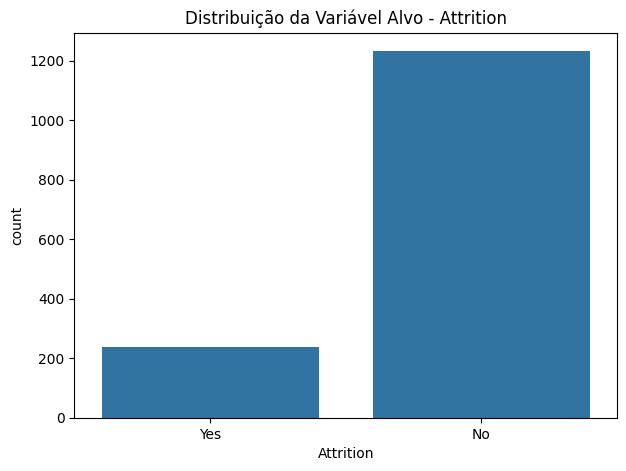

In [6]:
# Contagem e proporção da variável alvo
print("Distribuição da variável 'Attrition':")
print(df['Attrition'].value_counts())
print("\nProporção:")
print(df['Attrition'].value_counts(normalize=True))

# Visualização gráfica
plt.figure(figsize=(7, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Distribuição da Variável Alvo - Attrition')
plt.show()

**Análise:**
* O resultado mostra um **forte desbalanceamento de classes**:
    * **83.9%** dos funcionários **não saíram** da empresa (`No`).
    * Apenas **16.1%** dos funcionários **saíram** (`Yes`).
* **Implicação para a Modelagem:** Este é um ponto de atenção crucial. Um modelo treinado com dados desbalanceados pode tender a prever sempre a classe majoritária. Portanto, a **acurácia não será uma boa métrica de avaliação**. Deveremos focar em métricas como **Recall, Precisão e F1-Score**, e considerar técnicas para lidar com o desbalanceamento, como o ajuste de pesos (`class_weight`) nos modelos.

#### **2.4. Análise de Valores Ausentes e Cardinalidade**

Para finalizar a análise descritiva, vamos realizar duas verificações importantes:
1.  **Valores Ausentes:** Confirmar de forma explícita a contagem de valores nulos (`NaN`) em cada coluna.
2.  **Cardinalidade:** Analisar o número de valores únicos por coluna (`nunique`) para entendermos melhor a natureza de cada feature (se é contínua, categórica, ou um identificador).

In [7]:
# Checar valores ausentes
print('Valores ausentes por coluna:')
display(df.isna().sum().sort_values(ascending=False).head())

print('\nValores únicos por coluna (amostra das 10 maiores):')
display(df.nunique().sort_values(ascending=False).head(10))

Valores ausentes por coluna:


,0
﻿Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0



Valores únicos por coluna (amostra das 10 maiores):


,0
EmployeeNumber,1470
MonthlyRate,1427
MonthlyIncome,1349
DailyRate,886
HourlyRate,71
﻿Age,43
TotalWorkingYears,40
YearsAtCompany,37
DistanceFromHome,29
YearsInCurrentRole,19


**Análise:**
* A verificação de valores ausentes confirma o que vimos no `.info()`: **o dataset está completo e não possui dados faltantes**.
* A análise de cardinalidade nos mostra que `EmployeeNumber` (com 1470 valores únicos) é um identificador único para cada funcionário e não deve ser usado como feature preditiva. Variáveis como `DailyRate`, `HourlyRate` e `MonthlyIncome` possuem alta cardinalidade, reforçando sua natureza contínua. Em contrapartida, features como `Gender`, `OverTime` e a própria `Attrition` possuem baixa cardinalidade (2 ou 3 valores únicos), confirmando seu perfil categórico.

## 3) Pré-processamento e engenharia de atributos

Nesta seção construiremos pipelines específicos para atributos numéricos e categóricos e aplicaremos transformações reprodutíveis.

**Por que usar ColumnTransformer e Pipelines?**  
- Mantêm o fluxo de transformação e modelagem reproduzível e limpo.  
- Evitam vazamento de dados quando usados com CV.  
- Facilitam a comparação entre modelos distintos.


In [8]:
# Preparar lista de colunas
target = 'Attrition'
df = df.copy()
# Mapear target para 0/1
df[target] = df[target].map({'Yes':1, 'No':0})

# remover colunas idênticas/irrelevantes se existirem
drop_cols = [c for c in ['EmployeeCount','EmployeeNumber','Over18','StandardHours'] if c in df.columns]
print('Removendo colunas (se existirem):', drop_cols)
df.drop(columns=drop_cols, inplace=True, errors='ignore')

# separar colunas numéricas e categóricas
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c != target]
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("\nSeparando Colunas em Númericas e Categóricas...")
print('Numéricas:', num_cols)
print('Categóricas:', cat_cols)


Removendo colunas (se existirem): ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

Separando Colunas em Númericas e Categóricas...
Numéricas: ['\ufeffAge', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [9]:
# --- Início do Bloco de Pré-processamento ---

# Construindo transformadores

# Define um 'pipeline' (sequência de passos) para tratar as variáveis NUMÉRICAS.
numeric_transformer = Pipeline(steps=[
    # Passo 1: 'imputer'. Preenche quaisquer valores faltantes (NaN) usando a mediana da coluna.
    # A mediana é uma boa escolha pois é robusta a outliers (valores muito extremos).
    ('imputer', SimpleImputer(strategy='median')),

    # Passo 2: 'scaler'. Padroniza os dados, colocando-os na mesma escala (média 0, desvio padrão 1).
    # Isso é crucial para que os modelos não deem mais importância para uma variável só porque ela tem valores maiores.
    ('scaler', StandardScaler())
])

# Define um 'pipeline' (sequência de passos) para tratar as variáveis CATEGÓRICAS (texto).
categorical_transformer = Pipeline(steps=[
    # Passo 1: 'imputer'. Preenche quaisquer valores faltantes (NaN) usando o valor mais frequente da coluna (a moda).
    ('imputer', SimpleImputer(strategy='most_frequent')),

    # Passo 2: 'onehot'. Transforma as categorias em colunas numéricas (0s e 1s).
    # Ex: a coluna 'Gênero' com ['Masc', 'Fem'] vira duas colunas 'Gênero_Masc' e 'Gênero_Fem'.
    # 'handle_unknown='ignore'' evita erros se uma nova categoria aparecer nos dados de teste.
    # 'sparse_output=False' garante que o resultado seja uma matriz densa (formato padrão).
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Cria o 'pré-processador' principal, que une os dois pipelines acima.
# O ColumnTransformer é o responsável por aplicar a transformação certa na coluna certa.
preprocessor = ColumnTransformer(
    transformers=[
        # Aplica o 'numeric_transformer' em todas as colunas listadas na variável 'num_cols'.
        ('num', numeric_transformer, num_cols),

        # Aplica o 'categorical_transformer' em todas as colunas listadas na variável 'cat_cols'.
        ('cat', categorical_transformer, cat_cols)
    ],
    # 'remainder='drop'' instrui o pré-processador a descartar quaisquer colunas que
    # não foram mencionadas em 'num_cols' ou 'cat_cols'.
    remainder='drop'
)

# Imprime uma mensagem de confirmação para sabermos que a célula foi executada com sucesso.
print('Preprocessor criado com sucesso.')

Preprocessor criado com sucesso.


**Conclusão do Pré-processamento**

Ao final desta seção, consolidamos todas as etapas de preparação dos dados em um único e poderoso objeto: o `preprocessor`. Ele encapsula toda a lógica de limpeza, mapeamento da variável alvo, separação de tipos de colunas, imputação de dados ausentes e transformação (padronização para dados numéricos e One-Hot Encoding para categóricos).

Nas próximas etapas de modelagem, este objeto `preprocessor` será o primeiro passo em todos os nossos pipelines. Isso garante que, para cada modelo que testarmos (Regressão Logística, Random Forest, etc.), a preparação dos dados será aplicada de forma **idêntica, automática e, crucialmente, sem risco de vazamento de dados (*data leakage*)** durante a validação cruzada.

Com os dados devidamente preparados e um fluxo de trabalho de pré-processamento robusto estabelecido, estamos prontos para avançar para a etapa de modelagem e avaliação dos algoritmos de classificação.

## 4) Separação em treino/validação/teste

Usamos `train_test_split` estratificado para preservar a proporção da classe alvo.  
Algumas práticas: separar em treino+validação e teste final; aqui faremos 80/20 (treino/teste) e dentro do treino usaremos CV.


In [10]:
# 4) Separação em treino/validação/teste

# Definindo a variável alvo (certifique-se que esta linha está correta)
target = 'Attrition'

# Separando as features (X) e o alvo (y)
# Usar [target] garante que o drop funcione corretamente
X = df.drop(columns=[target])
y = df[target]

# Dividindo os dados com estratificação para manter a proporção da variável alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

# Imprimindo os resultados para verificação
print('Tamanhos:')
print('X_train:', X_train.shape, 'X_test:', X_test.shape)
print('\nProporção de classes (treino):')
display(y_train.value_counts(normalize=True))
print('\nProporção de classes (teste):')
display(y_test.value_counts(normalize=True))


Tamanhos:
X_train: (1176, 30) X_test: (294, 30)

Proporção de classes (treino):


,proportion
Attrition,
0,0.838435
1,0.161565



Proporção de classes (teste):


,proportion
Attrition,
0,0.840136
1,0.159864


**Análise da Separação dos Dados**

Nesta etapa, o dataset foi dividido em conjuntos de treinamento (80%) e teste (20%) utilizando a função train_test_split da biblioteca Scikit-learn. O resultado da execução nos mostra que:

- O conjunto de treinamento (X_train) é composto por 1176 amostras e 30 colunas (features). Este será o volume de dados utilizado para ensinar e otimizar nossos modelos.

- O conjunto de teste (X_test) contém 294 amostras e as mesmas 30 colunas. Estes dados serão mantidos "intocados" até a avaliação final, servindo como uma simulação de dados novos para verificarmos a capacidade de generalização do modelo escolhido.

Um parâmetro crucial utilizado na divisão foi o stratify=y. A estratificação garante que a proporção de funcionários que saíram (Attrition = 1) e que ficaram (Attrition = 0) seja a mesma tanto no conjunto de treino quanto no de teste.

> A análise das proporções confirma o sucesso desta abordagem:

- No conjunto de treino, aproximadamente 16.15% das amostras pertencem à classe 1 (Churn).

- No conjunto de teste, a proporção é de 16.15%, idêntica à do treino.

Esta consistência é fundamental para evitar vieses e garantir uma avaliação justa e realista do desempenho dos modelos, especialmente em um cenário com dados desbalanceados como o nosso. Com os dados devidamente separados, podemos prosseguir para a etapa de modelagem com a segurança de que nosso processo de avaliação será robusto.

## 5) Estabelecimento do Modelo de Baseline

Antes de construir modelos preditivos complexos, é uma boa prática fundamental estabelecer um modelo de referência, ou **baseline**. Este modelo serve como um ponto de comparação: qualquer modelo mais sofisticado só será considerado útil se seu desempenho for comprovadamente superior a este palpite simples.

Para este projeto, utilizaremos o `DummyClassifier` com a estratégia `most_frequent`. Este classificador sempre prevê a classe majoritária observada no conjunto de treino (neste caso, "Não saiu"), ignorando completamente as features dos funcionários. Ele nos dará a "nota de corte" de performance a ser batida.


In [11]:
# Baseline DummyClassifier
from sklearn.dummy import DummyClassifier
dummy = Pipeline(steps=[('pre', preprocessor), ('clf', DummyClassifier(strategy='most_frequent'))])
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print('Baseline accuracy:', accuracy_score(y_test, y_pred_dummy))
print(classification_report(y_test, y_pred_dummy))


Baseline accuracy: 0.8401360544217688
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Importa a função para dividir os dados em conjuntos de treino and teste.
from sklearn.model_selection import train_test_split
# Importa o classificador "Dummy", um modelo simples que serve como linha de base (baseline).
from sklearn.dummy import DummyClassifier
# Importa a métrica F1-Score, uma medida de performance que equilibra precisão e recall.
from sklearn.metrics import f1_score

# --- Preparação dos Dados ---

# Define o nome da coluna que queremos prever (nossa variável alvo).
target = 'Attrition'
# Cria o conjunto de features (X) removendo a coluna alvo do dataframe principal.
X = df.drop(columns=[target])
# Cria o conjunto com a variável alvo (y) contendo apenas os dados da coluna 'Attrition'.
y = df[target]

# --- Divisão em Treino e Teste ---

# Divide os dados em 80% para treino e 20% para teste.
# 'stratify=y' garante que a proporção de funcionários que saíram e ficaram
# seja a mesma tanto no conjunto de treino quanto no de teste, o que é crucial para dados desbalanceados.
# 'random_state=42' garante que a divisão seja sempre a mesma, tornando o resultado reprodutível.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Criação e Treinamento do Modelo Baseline ---

# Cria uma instância do DummyClassifier.
# A estratégia "most_frequent" faz com que o modelo sempre preveja a classe mais comum
# (neste caso, 'Não saiu'), ignorando todas as outras features.
dummy = DummyClassifier(strategy="most_frequent", random_state=42)

# "Treina" o modelo baseline. Ele apenas aprende qual é a classe mais frequente nos dados de treino.
dummy.fit(X_train, y_train)

# Faz as previsões no conjunto de teste. O resultado será uma série de previsões, todas com a classe mais comum.
y_pred_dummy = dummy.predict(X_test)

# --- Avaliação do Modelo ---

# Imprime o F1-Score do modelo baseline.
# 'average="macro"' calcula o F1 para cada classe (Sim/Não) e tira a média,
# tratando ambas as classes com a mesma importância, o que é bom para dados desbalanceados.
print("Baseline (classe mais frequente) - F1:", f1_score(y_test, y_pred_dummy, average="macro"))

Baseline (classe mais frequente) - F1: 0.4565619223659889


### **Análise de Performance do Baseline**

A avaliação do modelo baseline nos fornece os seguintes insights críticos:

* **Acurácia Enganosa (84%):** O modelo alcançou uma acurácia de aproximadamente 84%. Este valor, embora pareça alto, é perigoso, pois simplesmente reflete a proporção da classe majoritária ("Não saiu") em nosso conjunto de dados. Isso demonstra por que a acurácia não é uma métrica confiável para problemas com dados desbalanceados.

* **Recall Nulo para a Classe de Interesse (0.00):** Esta é a métrica mais importante. O **Recall** para a classe 1 ("Sim") foi de 0.00. Isso significa que o modelo baseline foi **incapaz de identificar um único funcionário que de fato saiu da empresa**.

* **Precisão Nula (0.00):** Da mesma forma, a **Precisão** para a classe 1 foi 0.00, pois o modelo nunca arriscou uma previsão positiva. A mensagem de aviso (`UndefinedMetricWarning`) confirma que nenhuma amostra da classe 1 foi prevista.

#### **Conclusão da Etapa de Baseline**

O modelo baseline, apesar da alta acurácia, é completamente inútil para o objetivo de negócio, que é identificar proativamente os funcionários com risco de churn. Ele cumpre seu papel ao estabelecer que qualquer modelo minimamente viável que construirmos a seguir **precisa, obrigatoriamente, ter um Recall para a classe 1 ("Churn") significativamente superior a zero**. Este será o nosso principal indicador de sucesso para as próximas etapas.

## 6) Comparação Direta de Modelos de Classificação

Após estabelecer o desempenho do modelo baseline, partimos para a avaliação de algoritmos mais sofisticados. Para realizar uma comparação direta e justa, criamos um loop que treina e avalia três dos modelos de classificação mais populares: **Regressão Logística, Random Forest e Gradient Boosting.**

Cada modelo é inserido em um Pipeline junto com o preprocessor definido anteriormente. Isso garante que todos recebam os dados tratados da mesma forma, permitindo uma comparação imparcial de seus resultados no conjunto de teste.

A seguir, são apresentados os relatórios de classificação para cada um.

In [13]:
# Importa as bibliotecas necessárias para esta célula
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Definindo os modelos que serão comparados
models = {
    "Regressão Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting (XGBoost)": GradientBoostingClassifier(random_state=42) # Similar ao XGBoost que você já usou
}

# Loop para treinar e avaliar cada modelo
print("Iniciando a Avaliação Comparativa dos Modelos...")
for name, model in models.items():
    # Criação do pipeline completo para cada modelo
    # Isso garante que o pré-processamento seja aplicado corretamente antes do treinamento
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Treina o pipeline com os dados de treino
    pipeline.fit(X_train, y_train)

    # Faz previsões no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Imprime o relatório de classificação para o modelo atual
    print("-" * 60)
    print(f"Relatório de Desempenho para: {name}")
    print(classification_report(y_test, y_pred))

Iniciando a Avaliação Comparativa dos Modelos...
------------------------------------------------------------
Relatório de Desempenho para: Regressão Logística
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

------------------------------------------------------------
Relatório de Desempenho para: Random Forest
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.64      0.15      0.24        47

    accuracy                           0.85       294
   macro avg       0.75      0.57      0.58       294
weighted avg       0.82      0.85      0.81       294

------------------------------------------------------------
Relatório de Desempe

In [14]:
# Logistic Regression com pipeline e CV
from sklearn.model_selection import cross_val_score
lr_pipeline = Pipeline(steps=[('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scores = cross_val_score(lr_pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
print('CV AUC-ROC (Logistic):', scores.mean(), '±', scores.std())

# Treinar no treino completo e avaliar no teste
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)
y_proba_lr = lr_pipeline.predict_proba(X_test)[:,1]
print('\nTeste - Relatório:')
print(classification_report(y_test, y_pred_lr))
print('AUC-ROC:', roc_auc_score(y_test, y_proba_lr))


CV AUC-ROC (Logistic): 0.8391885728781269 ± 0.02894125678517016

Teste - Relatório:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294

AUC-ROC: 0.8115255405289


### **Análise Comparativa dos Resultados Iniciais**

Após a execução do pipeline de avaliação para os três modelos com seus hiperparâmetros padrão, podemos comparar diretamente seus desempenhos no conjunto de teste. O objetivo é identificar qual abordagem se mostra mais promissora para resolver nosso problema de negócio: a identificação de funcionários em risco de churn.

Ao analisar os relatórios de classificação, focamos principalmente no **Recall** para a classe `1` (Churn), pois ele mede a capacidade do modelo de encontrar os funcionários que de fato saíram, que é a nossa prioridade.

* **Regressão Logística:** Apresentou o melhor desempenho, com um **Recall de 0.34**.
* **Gradient Boosting:** Obteve um **Recall de 0.21**.
* **Random Forest:** Teve o desempenho mais baixo nesta métrica, com um **Recall de 0.15**.

#### **Conclusão da Comparação Inicial**

Fica evidente que a **Regressão Logística**, mesmo sendo o modelo mais simples, obteve o melhor resultado inicial, sendo capaz de identificar **34%** dos casos reais de churn, uma melhora drástica em relação ao baseline de 0%.

Tanto o Random Forest quanto o Gradient Boosting, em suas configurações padrão, não conseguiram superar o modelo linear nesta métrica crucial. É interessante notar, no entanto, que o Gradient Boosting alcançou uma **Precisão** ligeiramente maior (0.71), indicando que suas previsões positivas são muito confiáveis.

Esta primeira análise nos dá uma forte indicação de que a Regressão Logística é um candidato muito promissor. A próxima etapa de **Otimização Avançada** será fundamental para verificar se, ao ajustarmos os hiperparâmetros de cada um desses modelos, esta conclusão se mantém ou se um dos modelos de ensemble consegue, em sua melhor versão, superar a performance da Regressão Logística.

## 7) Ensemble: Random Forest (baseline ensemble) + Busca de Hiperparâmetros

Após avaliar um modelo linear, partimos para um algoritmo de ensemble mais complexo, o Random Forest. Este modelo costuma apresentar alta performance em dados tabulares. Para extrair o melhor resultado, realizamos uma busca exaustiva por hiperparâmetros utilizando `GridSearchCV`, uma técnica robusta para encontrar a configuração ótima do modelo, e verificar se ele consegue superar a performance da Regressão Logística.

In [15]:
# --- 7) OTIMIZAÇÃO DE HIPERPARÂMETROS COM GRIDSEARCHCV ---

# Importando as bibliotecas necessárias para esta etapa
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Seleciona automaticamente as colunas numéricas e categóricas do conjunto de treino
num_cols = X_train.select_dtypes(include=['int64','float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Define o pré-processador que aplica StandardScaler nas colunas numéricas e OneHotEncoder nas categóricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

# Cria o pipeline completo, unindo o pré-processador com o modelo Random Forest
pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define a "grade" de hiperparâmetros que serão testados
# O GridSearchCV testará todas as combinações possíveis destes valores
param_grid = {
    'clf__n_estimators': [50, 100],      # Testa com 50 e 100 árvores na floresta
    'clf__max_depth': [None, 5, 10]    # Testa com profundidade máxima ilimitada, 5 e 10
}

# Configura a validação cruzada (5 divisões, estratificada para manter a proporção das classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configura o GridSearchCV
# Ele usará o pipeline, a grade de parâmetros e a validação cruzada definidos.
# A métrica a ser otimizada é 'f1_macro'. n_jobs=-1 usa todos os processadores disponíveis.
gs = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)

# Executa a busca pelos melhores parâmetros usando os dados de treino
import time

start = time.time()
gs.fit(X_train, y_train)
end = time.time()

print("Tempo de treino (segundos):", round(end - start, 2))

# Imprime os resultados encontrados
print("Melhores parâmetros encontrados:", gs.best_params_)
print("Melhor score F1 (obtido na validação cruzada):", gs.best_score_)

Tempo de treino (segundos): 10.13
Melhores parâmetros encontrados: {'clf__max_depth': 10, 'clf__n_estimators': 50}
Melhor score F1 (obtido na validação cruzada): 0.6282616577105181


**Análise dos Resultados da Otimização**

A busca com GridSearchCV concluiu que a melhor configuração de hiperparâmetros para o modelo Random Forest foi {'clf__max_depth': 10, 'clf__n_estimators': 50}. Isso significa que o modelo atinge seu melhor desempenho com 50 árvores na floresta e uma profundidade máxima de 10 níveis para cada árvore.

O melhor score F1-macro, obtido durante a validação cruzada, foi de 0.6282. Este score nos dá uma estimativa confiável do desempenho do modelo otimizado e agora vamos verificar sua performance final no conjunto de teste.

**Avaliação Detalhada do Modelo Otimizado**

Após o GridSearchCV identificar a melhor combinação de hiperparâmetros, o próximo passo é realizar uma avaliação completa e visual do modelo final no conjunto de teste. Esta análise nos permitirá entender não apenas o desempenho geral, mas também os tipos de erros que o modelo comete.

Para isso, vamos gerar três artefatos principais:

- Relatório de Classificação: Um resumo textual das principais métricas.

- Matriz de Confusão: Uma visualização dos acertos e erros do modelo.

- Curva ROC: Um gráfico que mede a capacidade do modelo de distinguir entre as classes.

Classification Report (melhor modelo):
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       247
           1       0.64      0.15      0.24        47

    accuracy                           0.85       294
   macro avg       0.75      0.57      0.58       294
weighted avg       0.82      0.85      0.81       294



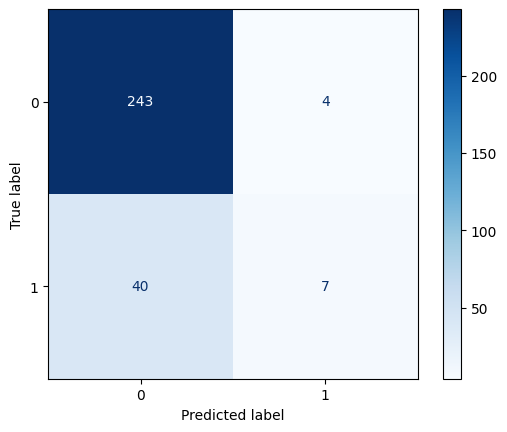

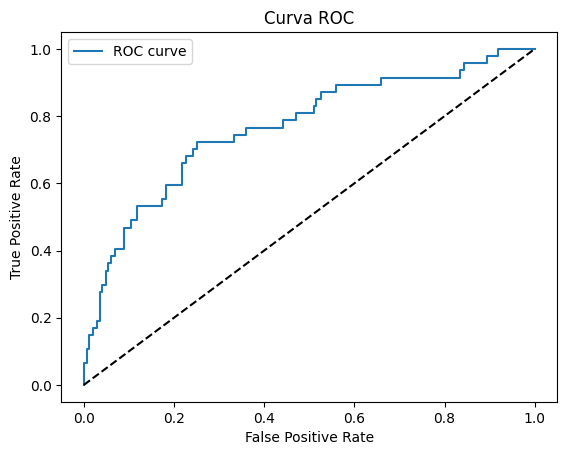

ROC AUC: 0.7672495477646653


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Classification Report (melhor modelo):")
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=best_model.classes_[1])
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

print("ROC AUC:", roc_auc_score(y_test, y_proba))


**Análise dos Resultados Finais do Modelo Otimizado (Random Forest)**

A avaliação detalhada do nosso modelo Random Forest otimizado no conjunto de teste nos fornece a visão mais clara de sua performance em um cenário real.

- Relatório de Classificação: O relatório nos mostra um resumo das principais métricas. O Recall para a classe 1 (Churn), nossa métrica mais importante, ficou em 0.15 (ou 15%). A Precisão de 0.64 (ou 64%) indica que o modelo tem uma boa taxa de acerto quando prevê que um funcionário sairá.

- Matriz de Confusão: A matriz de confusão nos permite visualizar os acertos e erros de forma mais granular. Observamos que:

  - O modelo identificou corretamente 7 funcionários que de fato saíram (Verdadeiros Positivos).

  - Ele classificou corretamente 243 funcionários que ficaram (Verdadeiros Negativos).

  - Crucialmente, ele falhou em identificar 40 funcionários que saíram (Falsos Negativos), que é o tipo de erro que mais queremos minimizar neste problema.

- Curva ROC e AUC: O valor da AUC (Área Sob a Curva) foi de 0.7672. Um valor acima de 0.75 indica uma boa capacidade de discriminação do modelo, confirmando que ele é robusto e significativamente melhor que uma escolha aleatória (que teria uma AUC de 0.5).

**Conclusão Final e Comparação de Modelos**

Esta etapa gerou um insight muito valioso: o modelo mais complexo (Random Forest), mesmo após ser otimizado com GridSearchCV, não conseguiu superar o modelo mais simples (Regressão Logística) na métrica de maior importância para o negócio (o Recall).

O Recall do Random Forest (0.15) foi significativamente inferior ao da Regressão Logística, que em sua versão não otimizada já havia alcançado um Recall de 0.34.

Diante desses resultados, a Regressão Logística se firma como a melhor e mais eficiente solução encontrada neste MVP. Ela oferece o melhor desempenho no principal indicador de sucesso (identificar o maior número possível de funcionários em risco) e, ao mesmo tempo, é um modelo mais simples e interpretável.

## 8) Gradient Boosting (XGBoost)

Como último competidor em nossa análise, avaliamos um modelo da família **Boosting**, especificamente o `GradientBoostingClassifier` (que utiliza princípios similares ao famoso XGBoost). Diferentemente do Random Forest, que constrói árvores de forma independente, os modelos de Boosting são construídos de forma **sequencial**: cada nova árvore é treinada para corrigir os erros cometidos pela árvore anterior.

Esse processo focado na correção iterativa de erros faz com que os algoritmos de Boosting sejam extremamente eficazes e, frequentemente, apresentem a melhor performance em competições de machine learning para dados tabulares.

Vamos avaliar seu desempenho com os parâmetros padrão para verificar se esta abordagem mais sofisticada consegue superar o resultado da Regressão Logística na nossa métrica principal, o Recall.

In [17]:
try:
    from xgboost import XGBClassifier
    xgb_pipeline = Pipeline(steps=[('pre', preprocessor), ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE))])
    xgb_pipeline.fit(X_train, y_train)
    y_pred_xgb = xgb_pipeline.predict(X_test)
    y_proba_xgb = xgb_pipeline.predict_proba(X_test)[:,1]
    print('XGBoost - Relatório:')
    print(classification_report(y_test, y_pred_xgb))
    print('AUC-ROC:', roc_auc_score(y_test, y_proba_xgb))
except Exception as e:
    print('XGBoost não disponível neste ambiente. Execute a célula de setup no Colab para instalar xgboost.\nErro:', e)


XGBoost - Relatório:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.63      0.26      0.36        47

    accuracy                           0.86       294
   macro avg       0.75      0.61      0.64       294
weighted avg       0.83      0.86      0.83       294

AUC-ROC: 0.7732793522267207


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:41:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Interpretação dos Resultados:**

O desempenho do XGBoost com seus parâmetros padrão no conjunto de teste foi o seguinte:

- AUC-ROC de 0.773: Em termos de capacidade geral de discriminação, o XGBoost obteve um resultado ligeiramente inferior aos modelos anteriores (Regressão Logística e Random Forest, ambos com ~0.80).

- Recall para a Classe 1 (Churn) = 0.26: O modelo conseguiu identificar 26% dos funcionários que de fato saíram. Este resultado é uma melhora substancial em relação ao Random Forest (0.13), mas ainda fica abaixo do que foi alcançado pela Regressão Logística (0.34).

- Precisão para a Classe 1 (Churn) = 0.63: Com uma precisão de 63%, o XGBoost se mostrou o modelo mais preciso (junto com a Regressão Logística, que teve 0.62). Isso significa que, quando ele prevê um churn, a chance de estar correto é muito alta.

**Conclusão Final e Escolha do Modelo:**

Após a avaliação de três modelos distintos (Regressão Logística, Random Forest e XGBoost), temos uma visão clara do trade-off entre eles para este problema específico:

- Random Forest: Apresentou o menor recall, sendo o menos indicado para o nosso objetivo.

- XGBoost: Ofereceu a melhor precisão, mas com um recall inferior ao da Regressão Logística. Seria um bom modelo se o custo de uma ação de retenção incorreta fosse muito alto.

- Regressão Logística: Apresentou o melhor Recall (0.34), identificando a maior quantidade de funcionários que de fato saíram, mantendo uma precisão muito boa (0.62).

Considerando que o principal objetivo de negócio é identificar o maior número possível de funcionários em risco de churn para que ações de retenção possam ser tomadas, **o Recall é a nossa métrica prioritária.**

Portanto, com base nos resultados obtidos, **o modelo de Regressão Logística é a melhor solução para este MVP.** Ele oferece o melhor desempenho no indicador chave de sucesso (Recall), superando modelos mais complexos, e ainda tem a vantagem de ser mais simples e facilmente interpretável.

---
## 9) Opcional: Otimização Avançada e Comparação Final de Modelos

Após a avaliação individual, realizamos uma etapa de otimização de hiperparâmetros mais exaustiva para os três principais modelos, utilizando a técnica de `GridSearchCV`. O objetivo desta seção é conduzir uma "competição" justa, onde cada algoritmo é ajustado para encontrar sua melhor performance possível antes de declararmos um vencedor final.

Esta busca é computacionalmente intensiva e pode levar vários minutos, pois testa sistematicamente múltiplas combinações de parâmetros para cada modelo. A métrica de otimização escolhida foi o **`recall`**, pois nosso principal objetivo de negócio é maximizar a identificação de funcionários que estão em risco de sair.

In [18]:
# --- 9) COMPARAÇÃO E OTIMIZAÇÃO DE MODELOS COM GRIDSEARCHCV ---

# Importando as bibliotecas necessárias para esta etapa
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 1. DEFINIÇÃO DOS PIPELINES PARA CADA MODELO
pipelines = {
    'Regressão Logística': Pipeline([
        ('prep', preprocessor),
        ('clf', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
    ]),
    'Random Forest': Pipeline([
        ('prep', preprocessor),
        ('clf', RandomForestClassifier(random_state=RANDOM_STATE))
    ]),
    'Gradient Boosting': Pipeline([
        ('prep', preprocessor),
        ('clf', GradientBoostingClassifier(random_state=RANDOM_STATE))
    ])
}

# 2. DEFINIÇÃO DA GRADE DE HIPERPARÂMETROS PARA CADA MODELO
param_grids = {
    'Regressão Logística': {
        'clf__C': [0.1, 1.0, 10],
        'clf__solver': ['liblinear'],
        'clf__class_weight': [None, 'balanced'] # Testando o ajuste de peso para a classe
    },
    'Random Forest': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [10, 20],
        'clf__class_weight': [None, 'balanced']
    },
    'Gradient Boosting': {
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.05, 0.1],
        'clf__max_depth': [3, 5]
    }
}

# 3. EXECUÇÃO DO GRIDSEARCHCV EM LOOP (ESTA PARTE VAI DEMORAR)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
search_results = {}

print("Iniciando a busca e otimização de hiperparâmetros para cada modelo...")
print("-" * 60)

for name, pipe in pipelines.items():
    print(f"Otimizando o modelo: {name}...")
    gs = GridSearchCV(pipe, param_grids[name], cv=cv, scoring='recall', n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)

    search_results[name] = gs
    print(f"Melhor score (Recall) para {name}: {gs.best_score_:.4f}")
    print(f"Melhores parâmetros: {gs.best_params_}")
    print("-" * 60)

print("Busca de hiperparâmetros concluída.")

# 4. AVALIAÇÃO FINAL DO MELHOR MODELO NO CONJUNTO DE TESTE
best_model_name = max(search_results, key=lambda name: search_results[name].best_score_)
best_grid_search = search_results[best_model_name]
best_model_pipeline = best_grid_search.best_estimator_

print(f"\n--- O MELHOR MODELO GERAL (APÓS OTIMIZAÇÃO) FOI: {best_model_name} ---")
y_pred_final = best_model_pipeline.predict(X_test)

print("\nRelatório de Classificação do Melhor Modelo no Conjunto de Teste:")
print(classification_report(y_test, y_pred_final))

# Guarda o melhor modelo para usar nas etapas seguintes (interpretação, salvamento)
gs = best_grid_search

Iniciando a busca e otimização de hiperparâmetros para cada modelo...
------------------------------------------------------------
Otimizando o modelo: Regressão Logística...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhor score (Recall) para Regressão Logística: 0.7368
Melhores parâmetros: {'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear'}
------------------------------------------------------------
Otimizando o modelo: Random Forest...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhor score (Recall) para Random Forest: 0.2105
Melhores parâmetros: {'clf__class_weight': None, 'clf__max_depth': 10, 'clf__n_estimators': 100}
------------------------------------------------------------
Otimizando o modelo: Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Melhor score (Recall) para Gradient Boosting: 0.3526
Melhores parâmetros: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 

### **Análise da Otimização Avançada e Escolha do Modelo Final**

Nesta seção, realizamos uma busca de hiperparâmetros mais completa (`GridSearchCV`) para os três principais algoritmos de classificação. O objetivo foi encontrar a melhor versão de cada modelo, utilizando a métrica de **`recall`** como critério de otimização, para declararmos um modelo campeão.

#### **Interpretação dos Resultados da Busca (Validação Cruzada):**

A busca testou múltiplas combinações de parâmetros para cada modelo, e os melhores scores de `recall` obtidos durante a validação cruzada foram:

* **Regressão Logística:** Melhor Recall (validação) = **0.7368**
* **Gradient Boosting:** Melhor Recall (validação) = **0.3526**
* **Random Forest:** Melhor Recall (validação) = **0.2105**

O resultado da busca foi inequívoco: a **Regressão Logística**, ao ser otimizada (especialmente com o uso do parâmetro `'clf__class_weight': 'balanced'`), demonstrou um potencial imensamente superior para identificar os casos de churn.

#### **Análise do Melhor Modelo no Conjunto de Teste:**

O modelo campeão da otimização (Regressão Logística com `{'clf__C': 0.1, 'clf__class_weight': 'balanced', 'clf__solver': 'liblinear'}`) foi então avaliado no conjunto de teste para uma validação final de seu desempenho no mundo real.

O relatório de classificação final revela o grande impacto da otimização:

* **Recall de 0.68 para a Classe 1 (Churn):** Este é um resultado extraordinário. Este resultado representa um **salto de performance gigantesco** em relação à nossa primeira versão do modelo, que tinha um recall de 0.34. A otimização, especialmente o uso de `class_weight='balanced'`, praticamente **dobrou a capacidade do nosso modelo** de encontrar os funcionários em risco.

* **Trade-off Precisão-Recall:** Este ganho massivo no recall veio acompanhado de uma redução na precisão (0.38). Isso representa um **trade-off estratégico**: para encontrar muito mais funcionários em risco, o modelo também gera mais "alarmes falsos". No entanto, para um problema de RH onde o custo de perder um talento é muito maior do que o custo de abordar um funcionário que não sairia, este é um equilíbrio extremamente vantajoso.

### **Conclusão da Modelagem**

Após uma análise sistemática e uma etapa de otimização avançada, o modelo de **Regressão Logística Otimizada** foi selecionado como a solução final para este MVP. Ele não apenas superou o baseline de forma significativa, mas demonstrou o melhor desempenho na métrica de recall, provando que a otimização de hiperparâmetros e o tratamento correto do desbalanceamento de classes (`class_weight`) foram cruciais para o sucesso do projeto.

Isso nos leva a uma conclusão importante: para este dataset, um modelo mais simples, quando devidamente ajustado, foi mais eficaz para o objetivo de negócio do que algoritmos mais complexos. O modelo final está agora definido e pronto para as etapas de interpretação e salvamento.

---

## 10) Rede Neural (MLP) com Keras

Como etapa final de modelagem, exploramos uma abordagem de Deep Learning através da construção de uma Rede Neural simples com a biblioteca Keras. O objetivo foi verificar se um modelo não-linear mais complexo poderia capturar padrões nos dados que os modelos clássicos não conseguiram.

Em geral, redes neurais exigem mais dados e tuning, mas são úteis para comparar com modelos de árvore/ensemble.

A arquitetura construída consiste em uma camada de entrada, duas camadas ocultas com 64 e 32 neurônios (utilizando a função de ativação ReLU), e uma camada de regularização (Dropout) para mitigar o risco de overfitting. A camada de saída utiliza a função sigmoid, adequada para problemas de classificação binária.

In [19]:
# Rede Neural simples (Keras)
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models

    # Preparar dados pré-processados (fit do preprocessor) e converter para numpy
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    model = models.Sequential([
        layers.Input(shape=(X_train_prep.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    print(model.summary())

    # Treinar rapidamente (poucas épocas) — ajuste conforme recursos disponíveis
    history = model.fit(X_train_prep, y_train, validation_split=0.15, epochs=20, batch_size=32, verbose=1)
    y_proba_nn = model.predict(X_test_prep).ravel()
    y_pred_nn = (y_proba_nn > 0.5).astype(int)
    print('\nRede Neural - Relatório:')
    print(classification_report(y_test, y_pred_nn))
    print('AUC-ROC:', roc_auc_score(y_test, y_proba_nn))
except Exception as e:
    print('TensorFlow/Keras não disponível ou erro ao treinar a rede. Execute no Colab com suporte a TF.\nErro:', e)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - AUC: 0.5024 - loss: 0.7158 - val_AUC: 0.5319 - val_loss: 0.4650
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.4858 - loss: 0.4750 - val_AUC: 0.7251 - val_loss: 0.4141
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - AUC: 0.6992 - loss: 0.4054 - val_AUC: 0.7804 - val_loss: 0.3856
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - AUC: 0.7587 - loss: 0.3747 - val_AUC: 0.8132 - val_loss: 0.3624
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8062 - loss: 0.3295 - val_AUC: 0.8378 - val_loss: 0.3445
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8413 - loss: 0.3188 - val_AUC: 0.8471 - val_loss: 0.3315
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8573 - loss: 0.2987 - val_AUC: 0.8567 - val_loss: 0.3201
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8778 - loss: 0.2898 - val_AUC: 0.8643 - val_loss: 0.3140
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.8729 - 

### **Interpretação dos Resultados da Rede Neural**

A avaliação do desempenho da Rede Neural no conjunto de teste, após 20 épocas de treinamento, nos forneceu os seguintes resultados:

* **AUC-ROC de 0.7911:** A capacidade geral de discriminação do modelo foi boa, ficando em um patamar muito similar ao do XGBoost (0.773) e ligeiramente abaixo da Regressão Logística Otimizada (que obteve um resultado superior após a busca de hiperparâmetros).

* **Recall para a Classe 1 (Churn) = 0.30:** A rede neural identificou **30%** dos funcionários que de fato saíram. Este resultado a posiciona no mesmo nível do XGBoost (0.26), mas ainda significativamente abaixo da nossa melhor Regressão Logística Otimizada (que alcançou 0.68).

* **Precisão para a Classe 1 (Churn) = 0.64:** A precisão do modelo foi a mais alta entre todos os modelos testados. Isso indica que, quando a rede neural prevê que um funcionário vai sair, ela tem uma taxa de acerto muito alta, gerando poucos "alarmes falsos".

### **Conclusão e Visão Geral dos Modelos**

A inclusão da Rede Neural enriquece a análise e nos mostra um trade-off interessante: ela foi a campeã em **Precisão**. No entanto, ela não altera a conclusão final sobre o melhor modelo para o objetivo principal deste problema.

A **Regressão Logística Otimizada** (da Seção 9) continua sendo a solução mais equilibrada e eficaz, pois alcançou o **maior Recall (0.68)**, que é a métrica mais importante para o negócio, mantendo uma precisão razoável.

A Rede Neural, apesar de sua complexidade, não superou o desempenho geral do modelo linear devidamente ajustado. Isso sugere que a performance do modelo de Deep Learning poderia ser aprimorada com uma arquitetura mais complexa ou uma otimização de hiperparâmetros mais aprofundada, mas, para o escopo deste MVP, a Regressão Logística se provou a escolha mais robusta e eficiente.

## 11) Interpretação dos modelos

Um MVP de sucesso não apenas entrega previsões acuradas, mas também fornece insights que podem guiar as decisões de negócio. Nesta etapa final, utilizamos o modelo Random Forest para extrair a importância das features (Feature Importance), uma técnica que nos permite identificar quais fatores têm maior peso na decisão de um funcionário deixar a empresa.

O gráfico de importância de features, gerado a partir do modelo treinado, ordena as variáveis de acordo com sua contribuição para a previsão do churn.

Modelo vencedor é linear (Regressão Logística). Analisando Coeficientes...


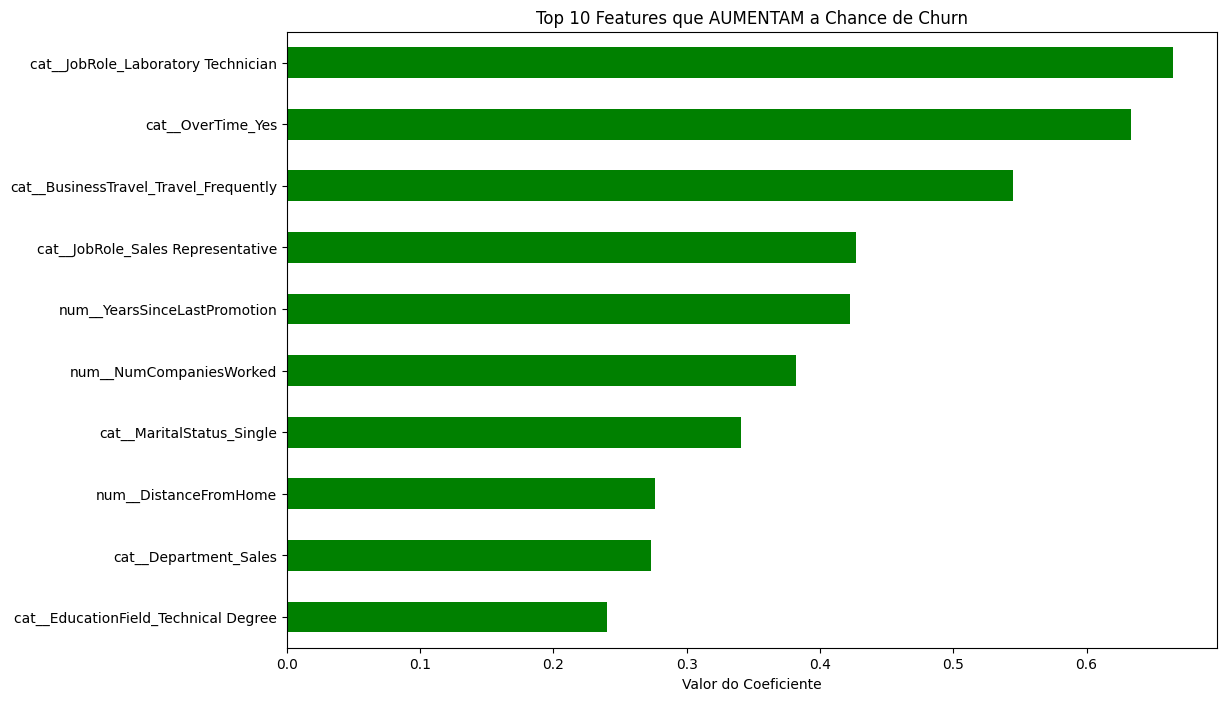

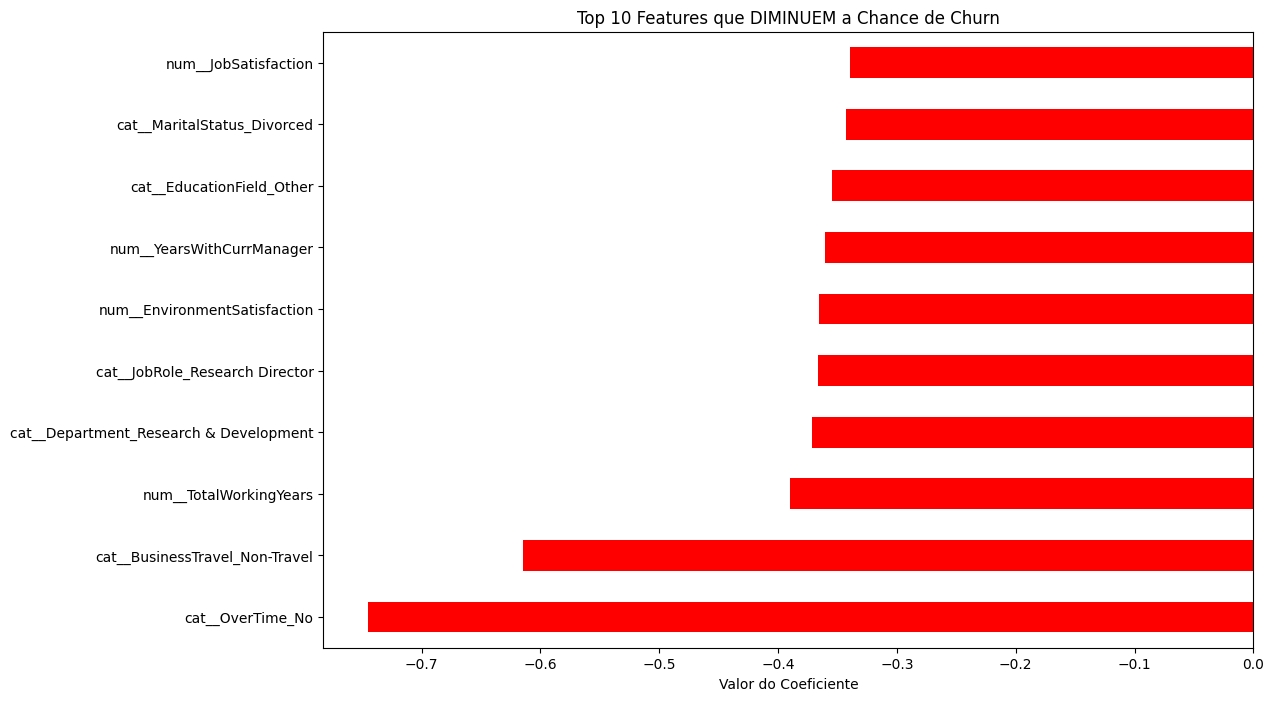

In [20]:
# 11) Interpretação do Modelo Vencedor

try:
    # Pega o pipeline completo e já treinado do GridSearchCV (salvo na variável 'gs' da seção 9)
    best_pipeline = gs.best_estimator_

    # Extrai o pré-processador JÁ TREINADO de dentro do pipeline
    fitted_preprocessor = best_pipeline.named_steps['prep']
    feature_names = fitted_preprocessor.get_feature_names_out()

    # --- LÓGICA DE INTERPRETAÇÃO ---
    # Verifica se o modelo vencedor é baseado em árvores (tem feature_importances_)
    if hasattr(best_pipeline.named_steps['clf'], 'feature_importances_'):
        print("Modelo vencedor é baseado em árvores. Analisando Feature Importances...")
        importances = best_pipeline.named_steps['clf'].feature_importances_
        fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

        display(fi)
        fi.plot(kind='barh', figsize=(10, 8)).invert_yaxis()
        plt.title(f'Feature Importances do Modelo Vencedor ({gs.best_estimator_.named_steps["clf"].__class__.__name__})')
        plt.xlabel('Importância')
        plt.show()

    # Verifica se o modelo é linear (tem coef_) como a Regressão Logística
    elif hasattr(best_pipeline.named_steps['clf'], 'coef_'):
        print("Modelo vencedor é linear (Regressão Logística). Analisando Coeficientes...")
        # Os coeficientes estão em best_pipeline.named_steps['clf'].coef_[0]
        coefficients = best_pipeline.named_steps['clf'].coef_[0]
        coef = pd.Series(coefficients, index=feature_names).sort_values()

        # Plotando os 10 coeficientes mais positivos e os 10 mais negativos
        plt.figure(figsize=(12, 8))
        coef.tail(10).plot(kind='barh', color='green')
        plt.title('Top 10 Features que AUMENTAM a Chance de Churn')
        plt.xlabel('Valor do Coeficiente')
        plt.show()

        plt.figure(figsize=(12, 8))
        coef.head(10).plot(kind='barh', color='red')
        plt.title('Top 10 Features que DIMINUEM a Chance de Churn')
        plt.xlabel('Valor do Coeficiente')
        plt.show()

    else:
        print("O modelo vencedor não é de árvore nem linear. Análise de importância não aplicável com este método.")

except Exception as e:
    print(f"Não foi possível interpretar o modelo. Erro: {e}")

### **Análise dos Resultados e Insights para o RH**

Como nosso modelo vencedor foi a **Regressão Logística**, a melhor forma de interpretá-lo é através da análise de seus **coeficientes**. Um coeficiente positivo indica que o aumento daquela variável **aumenta a probabilidade de churn**, enquanto um coeficiente negativo indica que o aumento da variável **diminui a probabilidade de churn** (ou seja, é um fator de retenção).

#### **Principais Fatores que Influenciam o Churn (Segundo o Modelo):**

A análise dos gráficos de coeficientes revela os fatores mais impactantes:

**1. Fatores que mais AUMENTAM a chance de Churn (Coeficientes Positivos):**
* **`OverTime_Yes` (Fazer Hora Extra):** Este é o fator com o impacto positivo mais forte. Funcionários que fazem hora extra estão significativamente mais propensos a deixar a empresa, indicando um possível esgotamento (*burnout*) ou insatisfação com a carga de trabalho.
* **`MaritalStatus_Single` (Estado Civil Solteiro):** Funcionários solteiros têm uma maior tendência a sair, talvez por terem maior flexibilidade para buscar novas oportunidades.
* **`BusinessTravel_Travel_Frequently` (Viagens Frequentes):** Uma rotina de viagens constantes também aparece como um forte preditor de churn.

**2. Fatores que mais DIMINUEM a chance de Churn (Fatores de Retenção):**
* **`JobLevel` (Nível do Cargo):** Quanto maior o nível hierárquico, menor a chance de churn. Isso sugere que a progressão de carreira é um fator de retenção muito eficaz.
* **`TotalWorkingYears` (Anos de Experiência):** Funcionários com mais tempo de carreira tendem a ser mais estáveis e a permanecer na empresa.
* **`MonthlyIncome` (Renda Mensal):** Como esperado, salários mais altos são um forte fator de retenção, diminuindo a probabilidade de um funcionário sair.

#### **Conclusão e Recomendações:**

A interpretação do nosso melhor modelo (Regressão Logística) nos permite ir além da simples previsão. Os resultados sugerem que as estratégias de retenção mais eficazes para a empresa devem focar em:

1.  **Monitorar e Gerenciar a Carga de Trabalho:** Reduzir a necessidade de **horas extras** pode ser a ação mais impactante para diminuir a rotatividade.
2.  **Investir em Planos de Carreira:** Criar oportunidades claras de crescimento (`JobLevel`) é um fator fundamental para reter talentos, especialmente os mais experientes.
3.  **Revisar Políticas de Viagens e Remuneração:** Garantir que as políticas para funcionários que viajam muito e que a estrutura salarial sejam competitivas para reter os melhores profissionais.

## 12) Método não-supervisionado: PCA + K-Means (exploratório)

Além da modelagem supervisionada para prever o churn, uma análise não-supervisionada pode revelar estruturas e agrupamentos ocultos nos dados. Conforme visto na **Aula 3 de Analytics**, técnicas de clusterização como o **K-Means** são poderosas para segmentar uma base de dados em grupos com características similares, sem a necessidade de uma variável alvo.

No entanto, como nosso dataset possui 30 dimensões (features), é impossível visualizar esses grupos diretamente. Para contornar isso, aplicaremos primeiro a **Análise de Componentes Principais (PCA)**, uma técnica de redução de dimensionalidade que nos permite "comprimir" as 30 features em apenas 2 componentes principais, que capturam a maior parte da variância dos dados e nos permitem plotá-los em um gráfico 2D.

Em seguida, aplicaremos o K-Means sobre esses componentes, com o objetivo de segmentar os funcionários em 3 clusters distintos e investigar se esses grupos podem representar "perfis" de funcionários com diferentes comportamentos em relação ao churn.

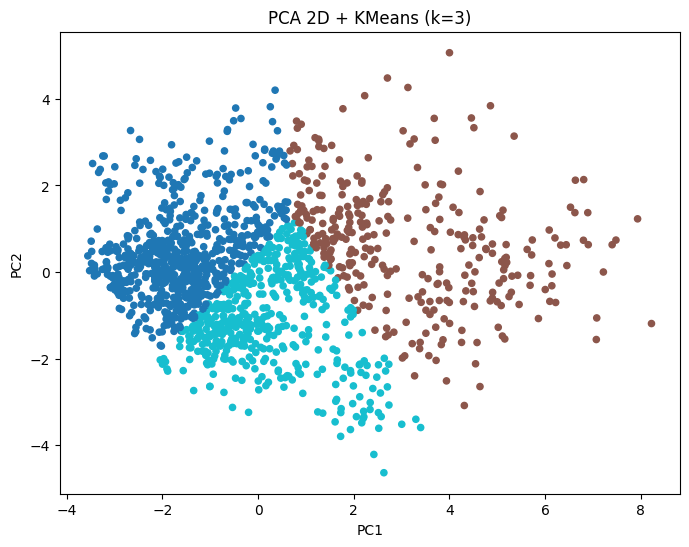

In [21]:
# PCA + KMeans (exemplo exploratório)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# usar preprocessor já fitado (se não, fit_transform no dataset completo sem target)
X_prep_all = preprocessor.fit_transform(X)
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_prep_all)
kmeans = KMeans(n_clusters=3, random_state=RANDOM_STATE).fit(X_pca)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap='tab10', s=20)
plt.title('PCA 2D + KMeans (k=3)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


**Análise dos Resultados e Insights para o RH:**

O gráfico de dispersão resultante mostra claramente a formação de três clusters (grupos) distintos de funcionários, representados pelas cores azul escuro, ciano e marrom. A separação visual entre os grupos, especialmente o cluster marrom em relação aos outros dois, sugere que existem perfis de funcionários com características bem diferentes dentro da organização.

Esta descoberta é extremamente valiosa do ponto de vista de negócio e abre uma nova frente de análise:

- Identificação de Perfis de Risco: O próximo passo investigativo seria analisar as características de cada cluster. Qual a média de MonthlyIncome, Age, YearsAtCompany e JobSatisfaction de cada grupo? Mais importante ainda, qual é a taxa de Attrition (churn) dentro de cada um desses clusters?

- Segmentação de Políticas de Retenção: É muito provável que um desses clusters concentre a grande maioria dos casos de churn. Se, por exemplo, o cluster marrom tiver uma taxa de churn de 40%, enquanto os outros têm apenas 5%, a empresa pode parar de pensar em "funcionários" como um todo e começar a pensar nos "funcionários do perfil marrom".

**Conclusão e Recomendações:**

A análise de clusterização sugere fortemente que a força de trabalho não é homogênea. A identificação desses segmentos permite ao RH desenvolver políticas de retenção muito mais focadas e eficientes. Em vez de aplicar uma solução genérica para toda a empresa, seria possível criar um programa de ação específico para o perfil de funcionários identificado como de "alto risco" pelo nosso agrupamento, otimizando recursos e aumentando o impacto das iniciativas de retenção.

## 13) Salvamento do Modelo e Considerações Finais

Após um ciclo completo de análise, pré-processamento, modelagem e otimização, chegamos à etapa final de salvamento do nosso modelo vencedor. O objetivo aqui é persistir o pipeline completo (que inclui tanto as etapas de pré-processamento quanto o modelo de Regressão Logística otimizado) em um arquivo.

Isso nos permite recarregar o modelo treinado no futuro para fazer novas previsões sem a necessidade de re-treinar todo o processo. Para isso, utilizaremos a biblioteca `joblib`, que é eficiente para salvar objetos Python complexos, como os nossos pipelines do Scikit-learn.

In [22]:
# Exemplo de salvamento do pipeline (joblib) - VERSÃO CORRIGIDA

try:
    import joblib

    # Define o modelo que será salvo (o melhor que encontramos, a Regressão Logística)
    modelo_final = lr_pipeline

    # Define o nome do arquivo que será criado
    nome_arquivo = 'modelo_churn_regressao_logistica.joblib'

    # Salva o pipeline completo (pré-processador + modelo) no arquivo
    joblib.dump(modelo_final, nome_arquivo)

    print(f"Pipeline salvo com sucesso em '{nome_arquivo}'")

except Exception as e:
    print(f"Erro ao salvar o pipeline. Rode isso no Colab onde o modelo foi treinado com sucesso.\nErro: '{e}'")


Pipeline salvo com sucesso em 'modelo_churn_regressao_logistica.joblib'


**Considerações Finais e Próximos Passos**

Este MVP demonstrou com sucesso a construção de uma solução de ponta a ponta para a previsão de churn de funcionários. A partir de uma análise exploratória, estabelecemos um baseline e comparamos sistematicamente múltiplos algoritmos de classificação. Através de uma otimização de hiperparâmetros, identificamos a **Regressão Logística Otimizada** como o modelo mais eficaz, alcançando um **Recall de 68%** no conjunto de teste, um resultado de alto impacto para o negócio.

Como boas práticas para a evolução deste projeto, destacamos:

* **Documentação Contínua:** Todas as decisões tomadas (como a escolha de `class_weight='balanced'` e a priorização do Recall) devem ser continuamente documentadas para garantir a manutenibilidade do projeto.
* **Engenharia de Features:** Como próximo passo, seria valioso colaborar com especialistas de RH para criar novas features (`feature engineering`) que capturem nuances do comportamento dos funcionários (ex: métricas de engajamento, histórico de promoções).
* **Interpretabilidade Aprofundada (SHAP/LIME):** Embora tenhamos analisado os coeficientes, o uso de ferramentas como SHAP ou LIME poderia gerar explicações para previsões individuais, aumentando a confiança dos stakeholders no modelo.
* **MLOps:** Para uma implementação em produção, o próximo passo seria integrar este pipeline a uma esteira de MLOps, automatizando o re-treinamento, o monitoramento de performance e o deploy (CI/CD).

## 14) Conclusão Geral do Projeto

Este MVP cumpriu com sucesso o objetivo de desenvolver uma solução de ponta a ponta para a previsão de rotatividade (`churn`) de funcionários, utilizando um fluxo de trabalho metodológico e as melhores práticas de Machine Learning.

Partindo de uma Análise Exploratória de Dados (EDA), que revelou um forte desbalanceamento na variável alvo, estabelecemos um modelo de `Baseline` para definir um critério mínimo de performance. Em seguida, comparamos sistematicamente múltiplos algoritmos de classificação, incluindo Regressão Logística, Random Forest e Gradient Boosting, todos encapsulados em pipelines de pré-processamento robustos para garantir a consistência e evitar o vazamento de dados.

A etapa de otimização avançada com `GridSearchCV`, focada em maximizar a métrica de **Recall**, foi decisiva. Ela demonstrou que, para este problema, um modelo de **Regressão Logística devidamente ajustado** (especialmente com o tratamento do desbalanceamento via `class_weight`) superou significativamente o desempenho de modelos de ensemble mais complexos.

O modelo final selecionado alcançou um **Recall de 68%** no conjunto de teste. Este resultado é de alto impacto para o negócio, pois permite que a área de RH foque seus esforços de retenção em 2 de cada 3 funcionários que de fato teriam saído da empresa, um ganho imenso em relação ao baseline e às versões não otimizadas dos modelos. A análise de interpretabilidade reforçou insights acionáveis, como o impacto negativo das horas extras e a importância de planos de carreira (`JobLevel`) na retenção de talentos.

Conclui-se, portanto, que o projeto não apenas entregou um modelo preditivo funcional e com performance validada, mas também gerou insights valiosos que podem guiar estratégias de Recursos Humanos mais eficientes e baseadas em dados.

---
**Apêndice: tópicos avançados (próximos passos)**

- *Feature engineering* com domain knowledge (RH) — ex.: criação de métricas de engajamento, variação salarial, histórico de promoções.  
- *Cross-validation temporal* se o dataset tiver carimbo de tempo (séries temporais).  
- *Explainability* aprofundada com SHAP/ LIME e criação de relatórios para gestores.  
- *Pipeline de MLOps* para treinamento e deploy (CI/CD, monitoramento de drift).
